# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

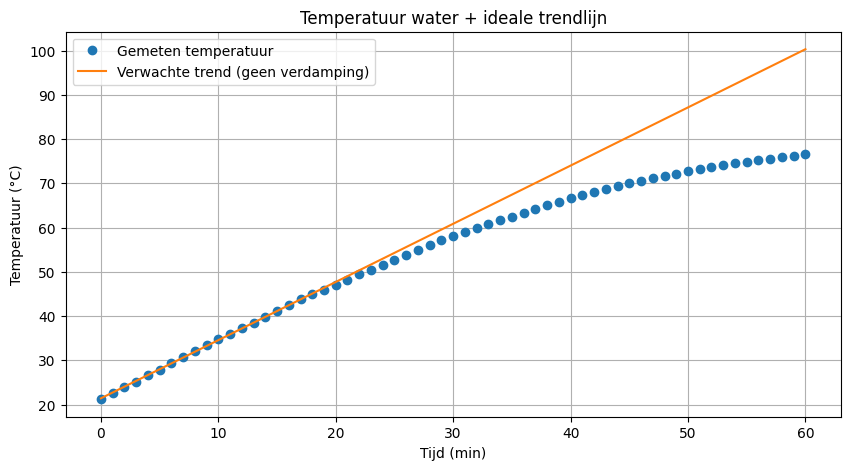

Startmassa water: 472.1 g
Eindmassa water:  454.1 g
Verdwenen water:  18.0 g
Geschat elektrisch vermogen: 43.3 W


In [ ]:
# 1.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data inlezen

df = pd.read_csv("tempmetingen.csv", sep=';')

t = df["t (min)"].to_numpy()
T = df["t (oC)"].to_numpy()

m_beaker = 820.8          # g
m_start_total = 1292.9    # g
m_end_total = 1274.9      # g

m_water_start = m_start_total - m_beaker       # g
m_water_end   = m_end_total - m_beaker         # g

# Trendlijn parameters
m_water = m_water_start        # g
c_water = 4.18                 # J/gK

# vermogen bepalen
mask = t < 20
coeffs = np.polyfit(t[mask], T[mask], 1)   # lineaire fit T = at + b
a = coeffs[0]     # helling
b = coeffs[1]

P = m_water * c_water * (a / 60)   # Watt

# Verwachte temperatuurverloop zonder verdamping

T_model = b + a * t   # zelfde helling als bepaald vermogen

# Plotten

plt.figure(figsize=(10,5))
plt.plot(t, T, 'o', label="Gemeten temperatuur")
plt.plot(t, T_model, '-', label="Verwachte trend (geen verdamping)")
plt.xlabel("Tijd (min)")
plt.ylabel("Temperatuur (°C)")
plt.title("Temperatuur water + ideale trendlijn")
plt.grid(True)
plt.legend()
plt.show()

# Print info
print(f"Startmassa water: {m_water_start:.1f} g")
print(f"Eindmassa water:  {m_water_end:.1f} g")
print(f"Verdwenen water:  {m_water_start - m_water_end:.1f} g")
print(f"Geschat elektrisch vermogen: {P:.1f} W")




In [2]:
# 2

# Data 
df = pd.read_csv("tempmetingen.csv", sep=";")
t = df["t (min)"].to_numpy()
T = df["t (oC)"].to_numpy()

m_beaker = 820.8
m_start = 1292.9
m_end   = 1274.9

m_water = m_start - m_beaker
m_evap  = (m_start - m_end)

# Constanten
c = 4.18      # J/gK
Lv = 2256     # J/g

# Vermogen uit eerste 20 min
a, b = np.polyfit(t[t<20], T[t<20], 1)
P = m_water * c * (a/60)

# energieen berekenen
Q_in    = P * (t[-1]*60)
Q_heat  = m_water * c * (T[-1] - T[0])
Q_evap  = m_evap * Lv

print("Q_in   =", Q_in/1000, "kJ")
print("Q_heat =", Q_heat/1000, "kJ")
print("Q_evap =", Q_evap/1000, "kJ")
print("Q_sum  =", (Q_heat+Q_evap)/1000, "kJ")


Q_in   = 155.73068279999998 kJ
Q_heat = 109.3251412 kJ
Q_evap = 40.608 kJ
Q_sum  = 149.93314120000002 kJ


In [7]:
# 3
#
#
#
#
#
#
#
#
#
#
#